In [14]:
import numpy as np
data = np.load("/home/qianghuang/CausalTransformer-main/multirun/2023-08-01/18-35-33/0/test_cf_one_step.npz")
data.files

FileNotFoundError: [Errno 2] No such file or directory: '/home/qianghuang/CausalTransformer-main/multirun/2023-08-01/18-35-33/0/test_cf_one_step.npz'

In [21]:
import numpy as np
data = np.load("/home/qianghuang/CausalTransformer-main/multirun/2023-08-02/15-28-15/0/train_f.npz")
# dict(data).keys()


array([[[1.84666527e+00],
        [2.17777167e+00],
        [2.22965235e+00],
        ...,
        [6.35648050e+00],
        [7.21172734e+00],
        [0.00000000e+00]],

       [[2.99102713e+01],
        [2.72076365e+01],
        [2.30325798e+01],
        ...,
        [7.99319204e-01],
        [6.90360651e-01],
        [0.00000000e+00]],

       [[1.29641041e+02],
        [1.14598847e+02],
        [1.09262688e+02],
        ...,
        [3.11645966e-01],
        [2.80040735e-01],
        [0.00000000e+00]],

       ...,

       [[6.31665151e+02],
        [5.59425488e+02],
        [5.47972467e+02],
        ...,
        [5.41317241e+00],
        [4.87844676e+00],
        [0.00000000e+00]],

       [[5.77414755e+00],
        [6.16279904e+00],
        [6.42229394e+00],
        ...,
        [1.53888258e-01],
        [1.20342328e-01],
        [0.00000000e+00]],

       [[9.27007689e+00],
        [9.81430707e+00],
        [1.03150234e+01],
        ...,
        [6.20680085e-01],
        [5.2547

In [16]:

# covariates: prev_treatments, prev_outputs, vitals, static_features
# treatment: current_treatments
# outcome: outputs
def transform_train_val(data_subset):
    if 'vitals' in data_subset.keys():
        vitals = data_subset['vitals']
    treatments = data_subset['current_treatments']
    outputs = data_subset['outputs']
    # active_entries = data_subset['active_entries']
    sequence_lengths = data_subset['sequence_lengths']

    sample_num, max_length = treatments.shape[0], treatments.shape[1]
    window_size = max_length
    prev_treatments = data_subset['prev_treatments']
    prev_outputs = data_subset['prev_outputs']
    static_features = data_subset['static_features']
    if 'vitals' in data_subset.keys():
        covariates = np.concatenate([vitals, prev_treatments, prev_outputs, static_features[:,np.newaxis,:].repeat(prev_treatments.shape[1], axis=1)], axis=-1)
    else:
        covariates = np.concatenate([prev_treatments, prev_outputs, static_features[:, np.newaxis, :].repeat(prev_treatments.shape[1], axis=1)], axis=-1)
    all_covariates, all_treatments, all_outputs = [], [], []

    for i, seq_len in enumerate(sequence_lengths):
        seq_len = int(seq_len)
        for t in range(seq_len):
            start = max(0, t - window_size + 1)
            pad_step = max(-t + window_size - 1, 0)
            valid_covariates = covariates[i, start:t + 1]
            valid_treatments = treatments[i, start:t + 1]
            valid_outputs = outputs[i, start:t + 1]
            if pad_step > 0:
                valid_covariates = np.concatenate([np.zeros((pad_step, valid_covariates.shape[1])), valid_covariates], axis=0)
                valid_treatments = np.concatenate([np.zeros((pad_step, valid_treatments.shape[1])), valid_treatments], axis=0)
                valid_outputs = np.concatenate([np.zeros((pad_step, valid_outputs.shape[1])), valid_outputs], axis=0)
            all_covariates.append(valid_covariates)
            all_treatments.append(valid_treatments[-1])
            all_outputs.append(valid_outputs[-1])

    all_covariates = np.stack(all_covariates, axis=0)
    all_treatments = np.stack(all_treatments, axis=0)
    all_outputs = np.stack(all_outputs, axis=0)
    return all_covariates, all_treatments, all_outputs


train_covariates, train_treatments, train_outputs = transform_train_val(data)
# print(train_covariates.shape)
# print(train_treatments.shape)
# print(train_outputs.shape)
# print(train_treatments.mean())


13.858298290497045 -0.24668544565873415


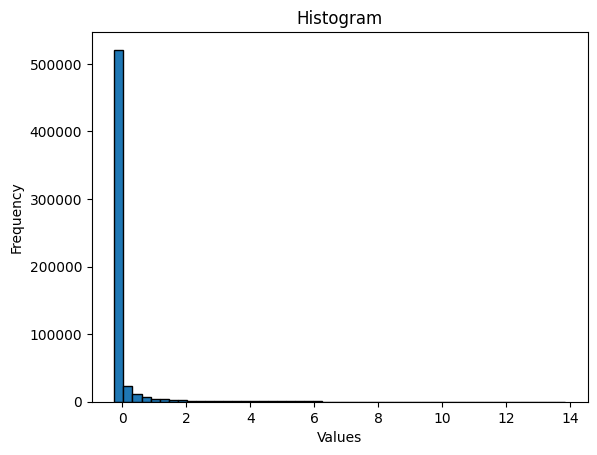

In [17]:
import matplotlib.pyplot as plt

# 示例数据
data =train_outputs
print(train_outputs.max(),train_outputs.min())

plt.hist(data, bins=50, edgecolor='black')

# 添加标题和标签
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')

# 显示图形
plt.show()

In [7]:
train_treatments.sum(axis=0)

array([136886., 126595., 126836., 126217.])

In [4]:
data_test = np.load("/home/qianghuang/CausalTransformer-main/multirun/2023-08-01/18-35-33/0/test_cf_one_step.npz")

In [4]:

# covariates: prev_treatments, prev_outputs, vitals, static_features
# treatment: current_treatments
# outcome: outputs
def transform_test(data_subset):
    if 'vitals' in data_subset.keys():
        vitals = data_subset['vitals']
    treatments = data_subset['current_treatments']
    outputs = data_subset['outputs']
    # active_entries = data_subset['active_entries']
    sequence_lengths = data_subset['sequence_lengths']

    sample_num, max_length = treatments.shape[0], treatments.shape[1]
    window_size = max_length
    prev_treatments = data_subset['prev_treatments']
    prev_outputs = data_subset['prev_outputs']
    static_features = data_subset['static_features']
    if 'vitals' in data_subset.keys():
        covariates = np.concatenate([vitals, prev_treatments, prev_outputs, static_features[:,np.newaxis,:].repeat(prev_treatments.shape[1], axis=1)], axis=-1)
    else:
        covariates = np.concatenate([prev_treatments, prev_outputs, static_features[:, np.newaxis, :].repeat(prev_treatments.shape[1], axis=1)], axis=-1)
    all_covariates, all_treatments, all_outputs = [], [], []

    for i, seq_len in enumerate(sequence_lengths):
        seq_len = int(seq_len)
        t = int(seq_len) - 1
        start = max(0, t - window_size + 1)
        pad_step = max(-t + window_size - 1, 0)
        valid_covariates = covariates[i, start:t + 1]
        valid_treatments = treatments[i, start:t + 1]
        valid_outputs = outputs[i, start:t + 1]
        if pad_step > 0:
            valid_covariates = np.concatenate([np.zeros((pad_step, valid_covariates.shape[1])), valid_covariates], axis=0)
            valid_treatments = np.concatenate([np.zeros((pad_step, valid_treatments.shape[1])), valid_treatments], axis=0)
            valid_outputs = np.concatenate([np.zeros((pad_step, valid_outputs.shape[1])), valid_outputs], axis=0)
        all_covariates.append(valid_covariates)
        all_treatments.append(valid_treatments[-1])
        all_outputs.append(valid_outputs[-1])

    all_covariates = np.stack(all_covariates, axis=0)
    all_treatments = np.stack(all_treatments, axis=0)
    all_outputs = np.stack(all_outputs, axis=0)
    return all_covariates, all_treatments, all_outputs


train_covariates, train_treatments, train_outputs = transform_test(data_test)
print(train_covariates.shape)
print(train_treatments.shape)
print(train_outputs.shape)
print(train_treatments.mean())


NameError: name 'data_test' is not defined

In [3]:
import pickle
import pandas
file_path = "/home/qianghuang/CausalTransformer-main/multirun/2023-08-02/15-28-15/0/train_scaling_params.pt"
with open(file_path, 'rb') as file:
    data = pickle.load(file)
data


(cancer_volume    20.118686
 chemo_dosage      4.823043
 radio_dosage      0.000000
 patient_types     2.002200
 dtype: float64,
 cancer_volume    81.556032
 chemo_dosage      2.946426
 radio_dosage      0.000000
 patient_types     0.813999
 dtype: float64)

In [20]:
import numpy as np
data = np.load('/home/qianghuang/CausalTransformer-main/multirun/2023-08-02/00-28-50/0/mean_std.npz')
data['arr_0']

array([63.66426754,  9.90886472])